In [1]:
import sys

import nvidia.cudnn
print(nvidia.cudnn.__file__)
sys.path.append('/global/homes/a/achen899/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/')
print(sys.path)

import tensorflow as tf

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))


/global/homes/a/achen899/.conda/envs/env_gan/lib/python3.9/site-packages/nvidia/cudnn/__init__.py
['/global/u1/a/achen899/normalizing-flow/gan4hep/nf', '/global/homes/a/achen899/.conda/envs/env_gan/lib/python39.zip', '/global/homes/a/achen899/.conda/envs/env_gan/lib/python3.9', '/global/homes/a/achen899/.conda/envs/env_gan/lib/python3.9/lib-dynload', '', '/global/homes/a/achen899/.conda/envs/env_gan/lib/python3.9/site-packages', '/global/u1/a/achen899/normalizing-flow', '/global/homes/a/achen899/.local/perlmutter/3.9-anaconda-2021.11/lib/python3.9/site-packages/']


2023-08-22 19:42:17.442519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 19:42:18.274810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from hadronic_display import Display

mpath = '/global/homes/a/achen899/normalizing-flow/train_out/hadronic_j'
cpath = '/global/homes/a/achen899/normalizing-flow/gan4hep/nf/config_nf_hadronic.yml'
dpath = '/global/cfs/cdirs/m3443/data/ForHadronic/train_data/wtanh/data_tanh_shifted.hkl'

hadron_e_display = Display(mpath, cpath, dpath, max_epochs=1200, epoch=109)
hadron_e_display.load_comparison("/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic/hadronic_display.root")
print("Comparison data loaded.")
events, counts, g_in = hadron_e_display.generate_events(100000, "out_nf")
print("Generated: ", events[0])
#hadron_e_display.make_graphs("/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv/887", events, counts, scale_by_target=True)

2023-08-22 19:42:37.103256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38199 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:c3:00.0, compute capability: 8.0


Loading latest checkpoint from: /global/homes/a/achen899/normalizing-flow/train_out/hadronic_j/checkpoints
Loaded checkpoint from /global/homes/a/achen899/normalizing-flow/train_out/hadronic_j/checkpoints/ckpt-109
Comparison data loaded.


2023-08-22 19:42:39.251558: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


(2, 99995, 5)
(3, 99943, 5)
(4, 99792, 5)
(5, 99544, 5)
(6, 99210, 5)
(7, 98554, 5)
(8, 97441, 5)
(9, 95665, 5)
(10, 93146, 5)
(11, 90051, 5)
(12, 86378, 5)
(13, 82229, 5)
(14, 77490, 5)
(15, 72081, 5)
(16, 65879, 5)
(17, 58817, 5)
(18, 50932, 5)
(19, 42641, 5)
(20, 34441, 5)
(21, 26601, 5)
(22, 19593, 5)
(23, 13735, 5)
(24, 9016, 5)
(25, 5600, 5)
(26, 3240, 5)
(27, 1707, 5)
(28, 847, 5)
(29, 403, 5)
(30, 161, 5)
(31, 59, 5)
(32, 19, 5)
(33, 6, 5)
(34, 1, 5)
(35, 0, 5)
Generated:  [[  2112.          44972.921875    40502.03125    -20143.52929688
   15721.08300781]]


In [3]:
#LOAD DATA

events, counts, g_in = hadron_e_display.load_gen("/global/homes/a/achen899/normalizing-flow/gan4hep/nf/out_nf")

In [ ]:
events, counts = hadron_e_display.generate_events(100000, "out_nf.csv")
print("Generated: ", events[0])
hadron_e_display.make_graphs("/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_tanh_shifted_wval", events, counts, scale_by_target=True)

In [3]:
hadron_e_display.time_generate_events("out_nf.csv", 10, "/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph", sample_counts=20, mode='per event')

Saved to:  /global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph/interval.png


In [3]:
import numpy as np
np.shape(list(hadron_e_display.partdict.values()))


(40,)

In [3]:
hadron_e_display.scale

array([ 45057.52171326, -13057.52171326])

In [7]:
from utils_plot_recurrent import plot_logfile
plot_logfile("/global/homes/a/achen899/normalizing-flow/train_out/hadronic_j/logs/results.txt", 950, 
             "/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv", 
             lr_filename="/global/homes/a/achen899/normalizing-flow/train_out/hadronic_j/logs/learning_rate.txt", use_val=True, cutoff=1)

In [4]:
import numpy as np
event_count = len(events)

cie = [part[0] for part in hadron_e_display.c_cond_vectors]
print(np.max(cie))
cle = [event[0] for event in hadron_e_display.c_df["particle_E"][:]]

cin = hadron_e_display.c_cond_vectors[:event_count]
ce = hadron_e_display.c_df["particle_E"][:event_count]
cpx = hadron_e_display.c_df["particle_px"][:event_count]
cpy = hadron_e_display.c_df["particle_py"][:event_count]
cpz = hadron_e_display.c_df["particle_pz"][:event_count]
cpt = hadron_e_display.c_df["particle_id"][:event_count]
ccounts =  hadron_e_display.c_counts[:event_count]

print(ce[0])
cl_mask = [c >= 0 for c in ccounts]
g_mask = [c >= 0 for c in counts]
# cl_mask = [event[0] <= 2500 for event in ce]
# g_mask = [event[0][1] <= 2500 for event in events]
# cl_mask = [(event[0] >= 20000 and event[0] < 30000) for event in ce]
# g_mask = [(event[0][1] >= 20000 and event[0][1] < 30000) for event in events]
# cn = 35
# cl_mask_2 = [(c >= 6 and c < 12) for c in ccounts]
# g_mask_2 = [(c >= 6 and c < 12) for c in counts]

# cl_mask = [(a and b) for a, b in zip(cl_mask, cl_mask_2)]
# g_mask = [(a and b) for a, b in zip(g_mask, g_mask_2)]

print(len(ce))
print(np.shape(cl_mask))

#hadron_e_display.c_counts[cl_mask]

31000.0
[ 1659.7401123   1201.4276123   3347.94677734   252.9879303
  1147.1517334   3485.12304688  2836.56958008  3536.40429688
 12170.234375     371.76797485  3545.23535156   973.10510254
  1957.40136719  1009.05444336  1885.82568359  3733.38867188]
100000
(100000,)


In [5]:
i_masked = cin[cl_mask]
ce_masked = [event for mask, event in zip(cl_mask, ce) if mask]
cpx_masked = [event for mask, event in zip(cl_mask, cpx) if mask]
cpy_masked = [event for mask, event in zip(cl_mask, cpy) if mask]
cpz_masked = [event for mask, event in zip(cl_mask, cpz) if mask]
cpt_masked = [event for mask, event in zip(cl_mask, cpt) if mask]
ccounts_masked = ccounts[cl_mask]
gcounts_mask = counts[g_mask]
events_mask = [event for mask, event in zip(g_mask, events) if mask]
i_gmasked = [part for mask, part in zip(g_mask, g_in) if mask]

events_m = [[ce, cpx, cpy, cpz] for ce, cpx, cpy, cpz in zip(ce_masked, cpx_masked, cpy_masked, cpz_masked)]
print(len(events_m))
print(len(events_mask))

100000
100000


in:  [31000.          8906.11523438  5569.53759766 30146.87695312]
out leading:  [3.19011406e+04 9.53801025e+02 3.28892994e+00 1.02549033e+04]
ptypes:  [2.2120000e+03 2.1120000e+03 2.2000000e+01 1.0000601e+09]
[array([3.19011406e+04, 9.53801025e+02, 3.28892994e+00, 1.02549033e+04]), array([ 8.96766797e+03, -3.95336800e+01, -2.54052997e+00, -1.94778099e+01]), array([ 5.47011328e+03,  1.29770844e+02, -3.22180003e-01, -3.00244198e+01]), array([ 3.01074941e+04, -9.24661713e+01,  2.06371999e+00,  1.29785019e+02])]
[array([9.53801025e+02, 3.28892994e+00, 1.02549033e+04]), array([-39.53367996,  -2.54052997, -19.47780991]), array([129.77084351,  -0.32218   , -30.02441978]), array([-92.46617126,   2.06371999, 129.78501892])]
[8906.115234375, 5569.53759765625]
[[ 9.53801025e+02  3.28892994e+00]
 [-3.95336800e+01 -2.54052997e+00]
 [ 1.29770844e+02 -3.22180003e-01]
 [-9.24661713e+01  2.06371999e+00]]


Text(0, 0.5, 'y')

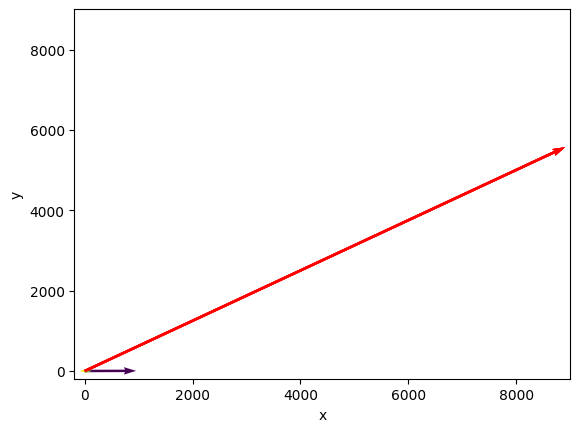

In [101]:
import matplotlib.pyplot as plt
event_n = 4
ax_names = ['x', 'y', 'z']
graph_axes = [1, 1, 0]
ax_names = [n for m, n in zip(graph_axes, ax_names) if m]

iax = [0] + graph_axes
p_in = i_masked[event_n]
print("in: ", p_in)
print("out leading: ", events_m[event_n][0])
print("ptypes: ", cpt_masked[event_n])
event_3p = [part[1:] for part in events_m[event_n]]

print(events_m[event_n])
print(event_3p)
graph_vect = np.array([[p for m, p in zip(graph_axes, part) if m] for part in event_3p])
in_vect = [p for m, p in zip(iax, p_in) if m]
print(in_vect)
print(graph_vect)

origin = np.zeros((2, np.shape(graph_vect)[0]))

color = np.sqrt(np.arange(np.shape(graph_vect)[0]))

plt.quiver(*origin, graph_vect[:,0], graph_vect[:,1], color, width=0.005, scale=1, scale_units='xy', angles='xy')
plt.quiver(*origin, *in_vect, color=['r'], width=0.005, scale=1, scale_units='xy', angles='xy')

x_min = np.min(graph_vect[:])
x_max = np.max(graph_vect[:])
in_min = np.min(in_vect)
in_max = np.max(in_vect)
scale_min = min(x_min, in_min)
scale_max = max(x_max, in_max)
plt.xlim(scale_min - 100, scale_max + 100)
plt.ylim(scale_min - 100, scale_max + 100)
plt.xlabel(ax_names[0])
plt.ylabel(ax_names[1])

in:  [31000.          4195.35839844 26171.87304688 17793.39453125]
out leading:  [111.         416.89453125 -86.30606079 355.46585083 157.36854553]
ptypes:  [111.0, 2112.0, 111.0, 2112.0, 111.0, 2112.0, -211.0, 111.0, 2212.0, 211.0, 2112.0, 2212.0, 2112.0, 2212.0, 211.0, 111.0, 3334.0, 2212.0, 2112.0, 2212.0, 2112.0, 2212.0]
31000.0


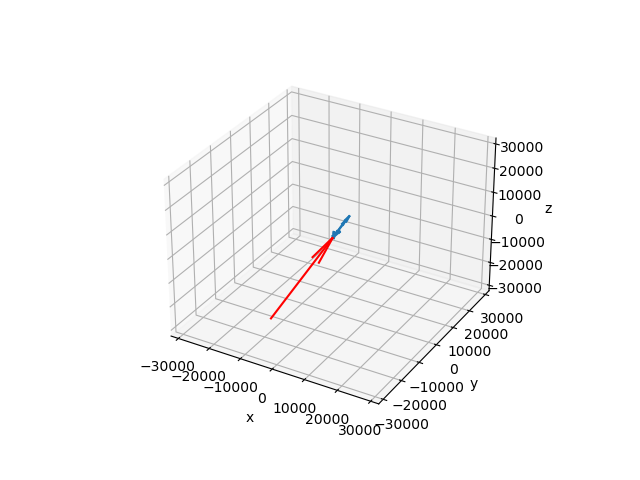

In [6]:
%matplotlib ipympl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

event_n = 83333
ax_names = ['x', 'y', 'z']
show_in = True
use_gen = True



if use_gen:
    p_in = i_gmasked[event_n]
    print("in: ", p_in)
    print("out leading: ", events_mask[event_n][0])
    print("ptypes: ", [part[0] for part in events_mask[event_n]])
    event_3p = np.array([part[2:] for part in np.array(events_mask[event_n])])
else:
    p_in = i_masked[event_n]
    print("in: ", p_in)
    print("out leading: ", np.array(events_m[event_n]).T[0])
    print("ptypes: ", cpt_masked[event_n])
    event_3p = np.array([part[1:] for part in np.array(events_m[event_n]).T])

#print(p_in[1], p_in[2], p_in[3], 0, 0, 0)
#print(events_m[event_n])
#print(event_3p)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax._axis3don = False

origin = np.zeros((3, np.shape(event_3p)[0]-1))
color = np.sqrt(np.arange(np.shape(event_3p)[0]))
ax.quiver(0, 0, 0, event_3p[0,0], event_3p[0,1], event_3p[0,2], color=['Orange'])
ax.quiver(*origin, event_3p[1:,0], event_3p[1:,1], event_3p[1:,2])
if show_in:
    ax.quiver(0, 0, 0, p_in[1], p_in[2], p_in[3], pivot='tip', color=['r'], arrow_length_ratio=0.3)


x_min = np.min(event_3p[:])
x_max = np.max(event_3p[:])
scale = max(np.abs(x_min), np.abs(x_max))
if show_in:
    in_min = np.min(-p_in)
    in_max = np.max(-p_in)
    scale_min = min(x_min, in_min)
    scale_max = max(x_max, in_max)
    scale = max(np.abs(scale_min), np.abs(scale_max))
print(scale)
ax.set_xlim3d(left=-scale - 100, right=scale + 100)
ax.set_ylim3d(bottom=-scale - 100, top=scale + 100)
ax.set_zlim3d(bottom=-scale - 100, top=scale + 100)
ax.set_xlabel(ax_names[0])
ax.set_ylabel(ax_names[1])
ax.set_zlabel(ax_names[2])


plt.show()


In [194]:
import os
import matplotlib.pyplot as plt

pn = 0
scale_by_target=True
use_prop = False
img_folder = "/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv/109/lelt2500"# + str(cn)
config = dict(histtype='step', lw=2)
os.makedirs(img_folder, exist_ok=True)

fontsize=16
minor_size=14
leg_size=12

leading = np.array([event[pn] for event in events_mask if len(event) > pn])


cc = ccounts[cl_mask]
cle = [event[pn] for event in ce_masked if len(event) > pn]
cpx = [event[pn] for event in cpx_masked if len(event) > pn]
cpy = [event[pn] for event in cpy_masked if len(event) > pn]
cpz = [event[pn] for event in cpz_masked if len(event) > pn]
cidx = [event[pn] for event in cpt_masked if len(event) > pn]
    
gtype = leading[:,0]
gidx = np.array([hadron_e_display.partdict.get(id, 0) for id in gtype])
gle = leading[:,1]
gpx = leading[:,2]
gpy = leading[:,3]
gpz = leading[:,4]

cidx = np.array([hadron_e_display.partdict.get(id, 0) for id in cidx])

graph_list = [[gle, cle], [gpx, cpx], [gpy, cpy], [gpz, cpz]]
graph_labels = ['Leading Particle Energy', 'Leading Particle p_x', 'Leading Particle p_y', 'Leading Particle p_z']
graph_shorthand = ['e', 'px', 'py', 'pz']

s_graph_list = [[gcounts_mask, cc], [gidx, cidx]]
s_graph_labels = ['Outgoing Particle Counts', 'Leading Particle Type']
s_graph_shorthand = ['pcount', 'type']

fig = plt.figure()
ax= fig.add_subplot() 

for i, a in enumerate(s_graph_list):
    save_path = os.path.join(img_folder, s_graph_shorthand[i] + '.png')
    max_v = np.max(a[0])
    max_v = int(max(max_v, np.max(a[1])))
    if use_prop:
        aa, nbins, _ = ax.hist(a[1], bins=max_v + 1, range=[0,max_v + 1], label='Target', weights=np.ones(len(a[1])) / len(a[1]), **config)
        ax.hist(a[0], bins=nbins, range=[0,max_v + 1], label='CNF', weights=np.ones(len(a[0])) / len(a[0]), **config)
    else:
        aa, nbins, _ = ax.hist(a[1], bins=max_v + 1, range=[0,max_v + 1], label='Target', **config)
        ax.hist(a[0], bins=nbins, range=[0,max_v + 1], label='CNF', **config)
    #count_gen, nbins, _ = ax.hist(pcounts, bins=max_count, range=[0,max_count], label='CNF', **config, weights=np.ones(pcounts.shape[0])/pcounts.shape[0])
    #ax.hist(ccounts, bins=nbins, range=[0,max_count], label='Target', **config, weights=np.ones(pcounts.shape[0])/pcounts.shape[0])
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax.set_xlabel(s_graph_labels[i], fontsize=fontsize)
    ax.set_ylabel('Number of events', fontsize=fontsize)
    ax.legend(fontsize=leg_size)
    plt.savefig(save_path, bbox_inches='tight')
    ax.clear()

for i, a in enumerate(graph_list):
    save_path = os.path.join(img_folder, graph_shorthand[i] + '.png')
    max_v = np.max(a[1])
    min_v = np.min(a[1])
    if not scale_by_target:
        max_v = int(max(max_v, np.max(a[0])))
        min_v = int(min(min_v, np.min(a[0])))
    if use_prop:
        ax.hist(a[1], bins=40, range=[min_v, max_v], weights=np.ones(len(a[1])) / len(a[1]), label='Target', **config)
        ax.hist(a[0], bins=40, range=[min_v, max_v], weights=np.ones(len(a[0])) / len(a[0]), label='CNF', **config)
    else:
        ax.hist(a[1], bins=40, range=[min_v, max_v], label='Target', **config)
        ax.hist(a[0], bins=40, range=[min_v, max_v], label='CNF', **config)
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax.set_xlabel(graph_labels[i], fontsize=fontsize)
    ax.set_ylabel('Number of events', fontsize=fontsize)
    ax.legend(fontsize=leg_size)
    plt.savefig(save_path, bbox_inches='tight')
    ax.clear()

print('Saved to: ', img_folder)

plt.close()

Saved to:  /global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv/109/lelt2500


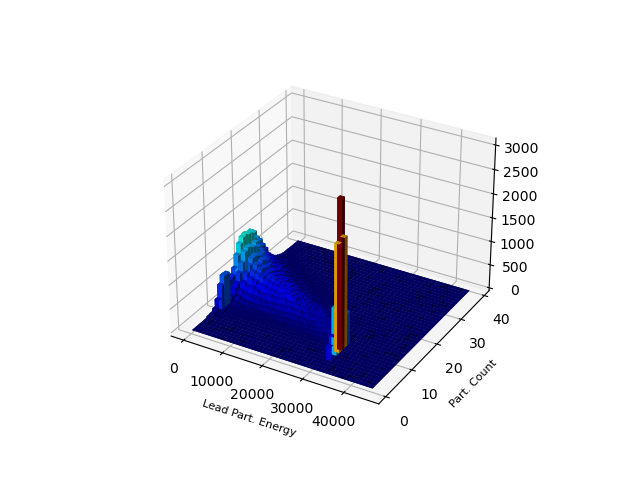

In [198]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(cle, cc, bins=39, range=[[0, 45000], [0, 39]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dz = hist.flatten()
max_height = np.max(dz)
min_height = np.min(dz)

cmap = cm.get_cmap('jet')
rgba = [cmap((k-min_height)/max_height) for k in dz] 

dx = 45000/39 * np.ones_like(zpos)
dy = 1 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_xlabel("Lead Part. Energy", fontsize=8)
ax.set_ylabel("Part. Count", fontsize=8)
plt.show()

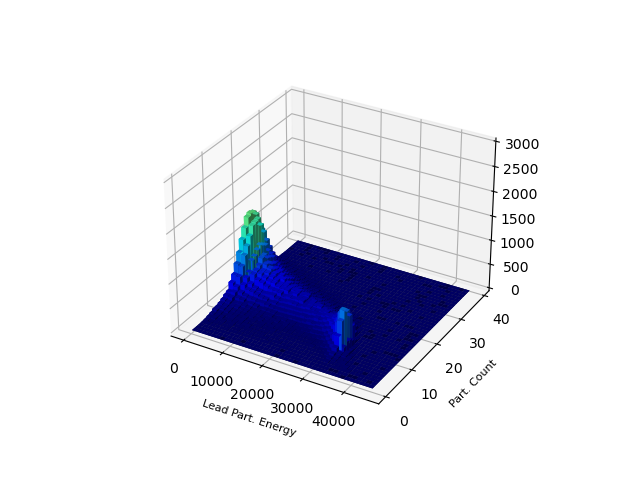

In [201]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

hist, xedges, yedges = np.histogram2d(gle, gcounts_mask, bins=39, range=[[0, 45000], [0, 39]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dz = hist.flatten()
# max_height = np.max(dz)
#min_height = np.min(dz)

# cmap = cm.get_cmap('jet')
rgba = [cmap((k-min_height)/max_height) for k in dz] 

dx = 45000/39 * np.ones_like(zpos)
dy = 1 * np.ones_like(zpos)
dz = hist.ravel()
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_xlabel("Lead Part. Energy", fontsize=8)
ax.set_ylabel("Part. Count", fontsize=8)
ax.set_zlim3d(bottom=0, top=3000)
plt.show()



In [138]:
plt.close('all')

In [82]:
print((cidx.tolist()).count(18))

38


In [73]:
import os

img_folder = "/global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv/masked"
os.makedirs(img_folder, exist_ok=True)
config = dict(histtype='step', lw=2)

fontsize=16
minor_size=14

cle = [event[0] for event in ce_masked]
cpx = [event[0] for event in cpx_masked]
cpy = [event[0] for event in cpy_masked]
cpz = [event[0] for event in cpz_masked]
cidx = [event[0] for event in cpt_masked]

cidx = np.array([hadron_e_display.partdict.get(id, 0) for id in cidx])


graph_list = [cle, cpx, cpy, cpz]
graph_labels = ['Leading Particle Energy', 'Leading Particle p_x', 'Leading Particle p_y', 'Leading Particle p_z']
graph_shorthand = ['e', 'px', 'py', 'pz']

s_graph_list = [hadron_e_display.c_counts[cl_mask], cidx]
s_graph_labels = ['Outgoing Particle Counts', 'Leading Particle Type']
s_graph_shorthand = ['pcount', 'type']

print(hadron_e_display.c_counts[cl_mask])
fig = plt.figure()
ax= fig.add_subplot() 

for i, a in enumerate(s_graph_list):
    save_path = os.path.join(img_folder, s_graph_shorthand[i] + '.png')
    max_v = int(np.max(a))
    aa, nbins, _ = ax.hist(a, bins=max_v, range=[0,max_v], label='Target', **config)
    #count_gen, nbins, _ = ax.hist(pcounts, bins=max_count, range=[0,max_count], label='CNF', **config, weights=np.ones(pcounts.shape[0])/pcounts.shape[0])
    #ax.hist(ccounts, bins=nbins, range=[0,max_count], label='Target', **config, weights=np.ones(pcounts.shape[0])/pcounts.shape[0])
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax.set_xlabel(s_graph_labels[i], fontsize=fontsize)
    ax.set_ylabel('Number of events', fontsize=fontsize)
    plt.savefig(save_path, bbox_inches='tight')
    ax.clear()

for i, a in enumerate(graph_list):
    save_path = os.path.join(img_folder, graph_shorthand[i] + '.png')
    max_v = np.max(a)
    min_v = np.min(a)

    ax.hist(a, bins=40, range=[min_v, max_v], label='Target', **config)
    ax.tick_params(width=2, grid_alpha=0.5, labelsize=minor_size)
    ax.set_xlabel(graph_labels[i], fontsize=fontsize)
    ax.set_ylabel('Number of events', fontsize=fontsize)
    plt.savefig(save_path, bbox_inches='tight')
    ax.clear()

print('Saved to: ', img_folder)

plt.close()

[8 9 9 ... 9 8 7]
Saved to:  /global/homes/a/achen899/normalizing-flow/gan4hep/nf/hadronic_graph_inv/masked


In [143]:
gcounts_mask

array([1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3.])

In [74]:
hadron_e_display.partdict

{-3334.0: 0.0,
 -3322.0: 1.0,
 -3312.0: 2.0,
 -3222.0: 3.0,
 -3212.0: 4.0,
 -3122.0: 5.0,
 -3112.0: 6.0,
 -2212.0: 7.0,
 -2112.0: 8.0,
 -321.0: 9.0,
 -211.0: 10.0,
 22.0: 11.0,
 111.0: 12.0,
 130.0: 13.0,
 211.0: 14.0,
 221.0: 15.0,
 310.0: 16.0,
 321.0: 17.0,
 331.0: 18.0,
 2112.0: 19.0,
 2212.0: 20.0,
 3112.0: 21.0,
 3122.0: 22.0,
 3212.0: 23.0,
 3222.0: 24.0,
 3312.0: 25.0,
 3322.0: 26.0,
 3334.0: 27.0,
 1000010048.0: 28.0,
 1000020032.0: 29.0,
 1000020096.0: 30.0,
 1000030016.0: 31.0,
 1000030080.0: 32.0,
 1000040064.0: 33.0,
 1000040128.0: 34.0,
 1000050048.0: 35.0,
 1000050112.0: 36.0,
 1000060096.0: 37.0,
 1000070080.0: 38.0,
 1000070144.0: 39.0}